# 📊 Bellabeat Data Visualizations
# Author: Ryan Attia
# Purpose: Visualize key insights from Fitbit dataset to inform Bellabeat's marketing strategy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ---------------------------
# 🔹 Load Cleaned Datasets
# ---------------------------

In [ ]:
activity = pd.read_csv("../data/processed/clean_daily_activity_merged.csv")
sleep = pd.read_csv("../data/processed/clean_sleep_day.csv")

activity['activitydate'] = pd.to_datetime(activity['activitydate'])
sleep['activitydate'] = pd.to_datetime(sleep['activitydate'])

# Merge activity and sleep
merged = pd.merge(activity, sleep, on=['id', 'activitydate'])

# ---------------------------
# 1. Correlation Heatmap
# ---------------------------

C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\3800072840.py:4: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


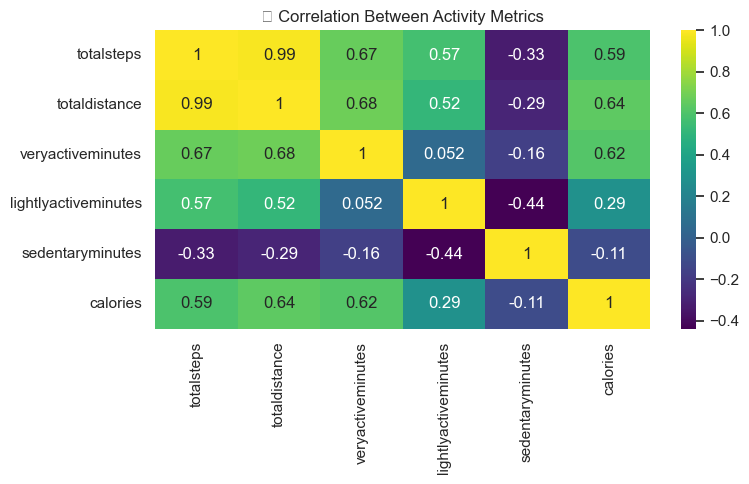

In [5]:
plt.figure(figsize=(8, 5))
sns.heatmap(activity[['totalsteps', 'totaldistance', 'veryactiveminutes', 'lightlyactiveminutes', 'sedentaryminutes', 'calories']].corr(), annot=True, cmap='viridis')
plt.title("🔗 Correlation Between Activity Metrics")
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Average Steps by Weekday
# ---------------------------

C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\2199778349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_steps.index, y=avg_steps.values, palette='Set2')
C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\2199778349.py:9: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


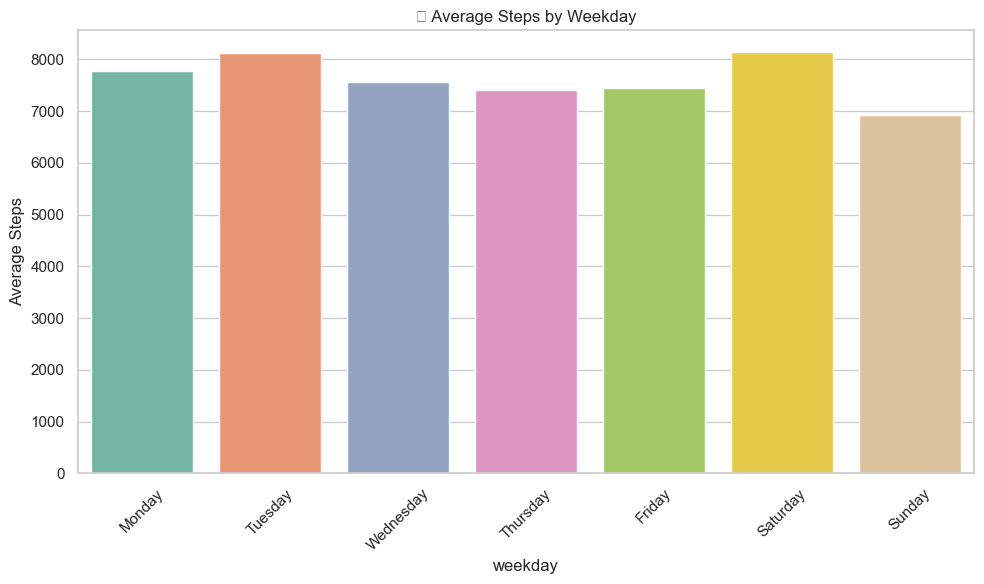

In [6]:
activity['weekday'] = activity['activitydate'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_steps = activity.groupby('weekday')['totalsteps'].mean().reindex(weekday_order)

sns.barplot(x=avg_steps.index, y=avg_steps.values, palette='Set2')
plt.title("📅 Average Steps by Weekday")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Steps vs Calories
# ---------------------------

C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\36811258.py:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


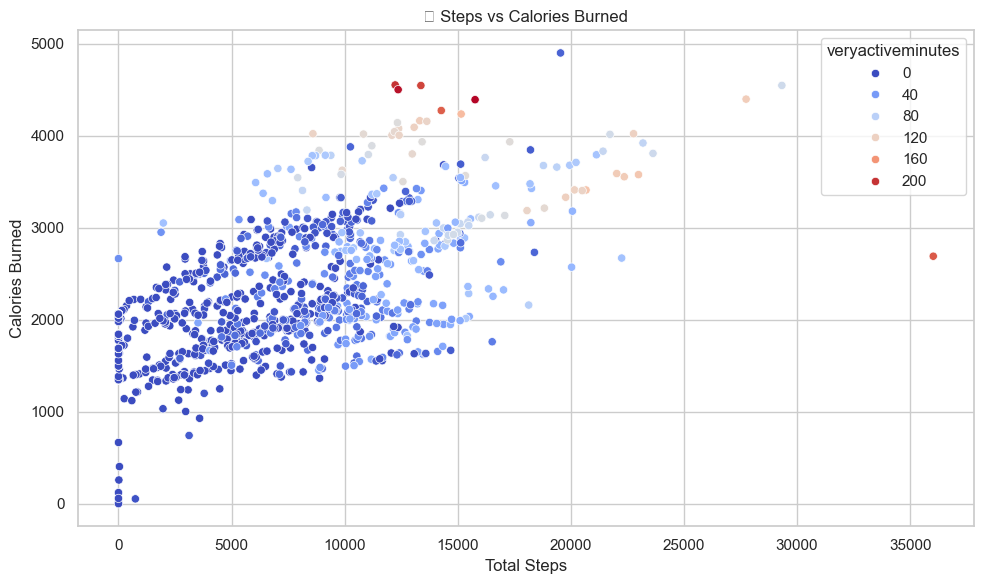

In [7]:
sns.scatterplot(data=activity, x='totalsteps', y='calories', hue='veryactiveminutes', palette='coolwarm')
plt.title("🔥 Steps vs Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()

# ---------------------------
# 4. Sleep vs Steps
# ---------------------------

C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\492591291.py:5: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


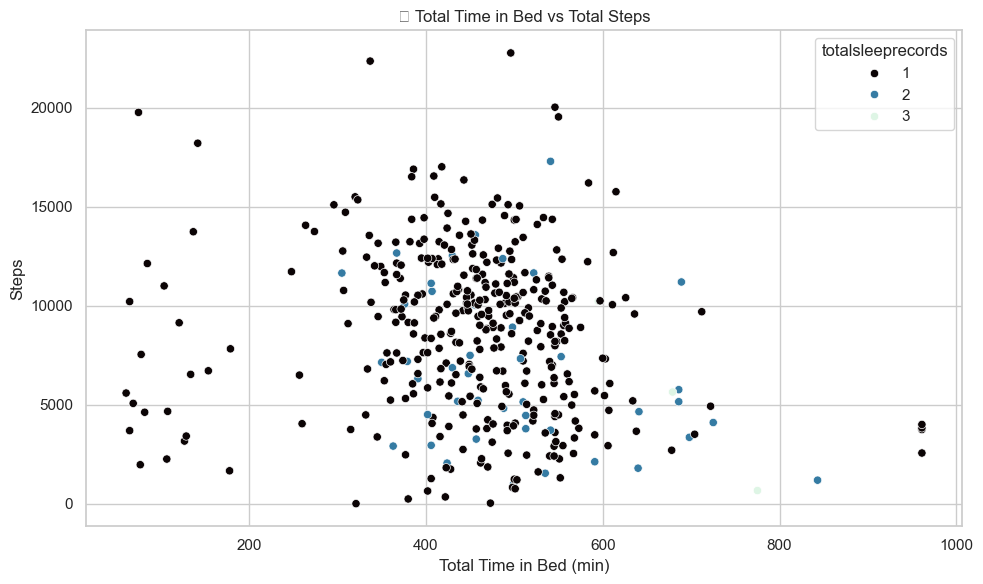

In [8]:
sns.scatterplot(data=merged, x='totaltimeinbed', y='totalsteps', hue='totalsleeprecords', palette='mako')
plt.title("😴 Total Time in Bed vs Total Steps")
plt.xlabel("Total Time in Bed (min)")
plt.ylabel("Steps")
plt.tight_layout()
plt.show()

# ---------------------------
# 5. User Activity Level Segmentation
# ---------------------------

C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\640894162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=activity, x='activity_level', palette='pastel')
C:\Users\ryana\AppData\Local\Temp\ipykernel_48336\640894162.py:7: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


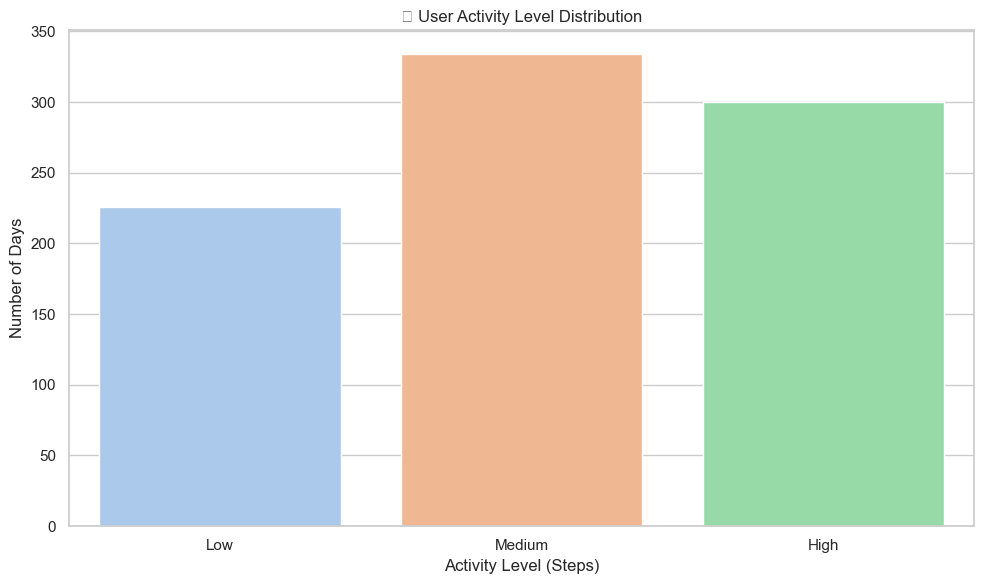

✅ All visualizations generated successfully!


In [9]:

activity['activity_level'] = pd.cut(activity['totalsteps'], bins=[0, 5000, 10000, 25000], labels=['Low', 'Medium', 'High'])

sns.countplot(data=activity, x='activity_level', palette='pastel')
plt.title("👟 User Activity Level Distribution")
plt.xlabel("Activity Level (Steps)")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

print("✅ All visualizations generated successfully!")